In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ArrestData.csv')

In [3]:
df

,arrest_key,arrest_date,pd_cd,pd_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,jurisdiction_code,age_group,perp_sex,perp_race,x_coord_cd,y_coord_cd,latitude,longitude
0,236791704,2021-11-22T00:00:00.000,581.0,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409
1,237354740,2021-12-04T00:00:00.000,153.0,RAPE 3,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296
2,236081433,2021-11-09T00:00:00.000,681.0,"CHILD, ENDANGERING WELFARE",PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047
3,32311380,2007-06-18T00:00:00.000,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN
4,192799737,2019-01-26T00:00:00.000,177.0,SEXUAL ABUSE,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498645,255851599,2022-12-13T00:00:00.000,969.0,"TRAFFIC,UNCLASSIFIED INFRACTIO",VTL051101A,M,M,32,0.0,25-44,M,BLACK,1000188.0,238820.0,40.822167,-73.942415
5498646,256469262,2022-12-16T00:00:00.000,198.0,CRIMINAL CONTEMPT 1,PL 21551B3,F,B,46,0.0,25-44,M,BLACK,1011750.0,250274.0,40.853578,-73.900591
5498647,260305039,2022-12-20T00:00:00.000,548.0,"GAMBLING, DEVICE, POSSESSION",PL 2253001,M,K,72,0.0,25-44,F,ASIAN / PACIFIC ISLANDER,981944.0,171869.0,40.638420,-74.008307
5498648,255843041,2022-12-13T00:00:00.000,101.0,ASSAULT 3,PL 1200001,M,M,5,0.0,45-64,M,ASIAN / PACIFIC ISLANDER,986159.0,200104.0,40.715917,-73.993111


In [4]:
df.dropna(inplace=True)

In [5]:
df2 = df[['latitude','arrest_precinct']]

In [6]:
df2

,latitude,arrest_precinct
1,40.816392,41
2,40.679700,113
4,40.800694,25
7,40.804013,41
8,40.691660,113
...,...,...
5498645,40.822167,32
5498646,40.853578,46
5498647,40.638420,72
5498648,40.715917,5


In [7]:
df3 = df2.sample(frac=0.001, random_state=42)

In [8]:
df3

,latitude,arrest_precinct
458957,40.757578,14
1069410,40.752153,14
746022,40.859335,34
2560272,40.758232,18
3426805,40.915048,113
...,...,...
4276016,40.687456,113
3712406,40.638790,120
3125585,40.823387,43
3367590,40.665534,75


In [9]:
from sklearn.preprocessing import StandardScaler
ss_scaler = StandardScaler()
df4 = ss_scaler.fit_transform(df3)

In [10]:
df4 = pd.DataFrame(df4, columns = df2.columns) 

In [11]:
df4

,latitude,arrest_precinct
0,-0.004099,-1.348921
1,-0.015009,-1.348921
2,0.200522,-0.774469
3,-0.002783,-1.234031
4,0.312554,1.494614
...,...,...
5462,-0.145106,1.494614
5463,-0.242968,1.695672
5464,0.128235,-0.515966
5465,-0.189189,0.403156


In [12]:
df4 = df4[df4['latitude']<5]

In [13]:
y = df4[['arrest_precinct']]
x = df4.drop(columns = ['arrest_precinct'])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [24]:
X_test

,latitude
679,0.202069
3866,0.100504
5008,-0.010542
5398,0.007919
1853,-0.193658
...,...
1923,0.150448
406,0.210563
450,0.106743
32,0.142192


In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [16]:
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
reg.score(X_test,y_test)

0.24401336587677402

In [18]:
print("Coefficient:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficient: [[-3.08683504]]
Intercept: [-0.11321216]


In [19]:
y_pred = reg.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.6736856898618923
Mean Squared Error (MSE): 0.7405936652384466
R² Score: 0.24401336587677402


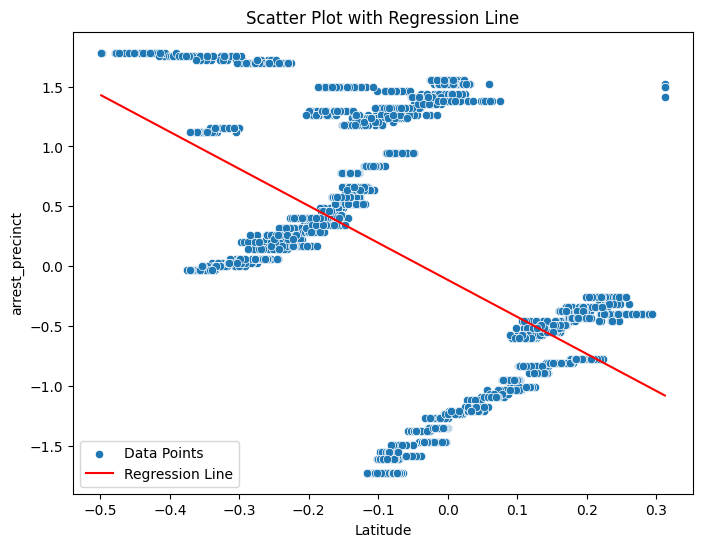

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='latitude', y='arrest_precinct', data=df4, label='Data Points')

# Generate predictions across a range for the regression line
x_line = np.linspace(df4['latitude'].min(), df4['latitude'].max(), 100)
y_line = reg.predict(pd.DataFrame({'latitude': x_line}))

# Plot the regression line
plt.plot(x_line, y_line, color='red', label='Regression Line')

plt.xlabel('Latitude')
plt.ylabel('arrest_precinct')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.show()